In [28]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load DATA SET

In [29]:
DATA_IN_PATH = './data_set/'

In [30]:
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')

In [31]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


# TRAIN DATA EDA

In [32]:
print('파일 크기 : ')
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
sample_submission.csv         24.69MB
test.csv                      481.16MB
train.csv                     63.4MB


### train data set size < test data set size

In [33]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 404290


In [34]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)

In [35]:
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [36]:
print('학습 데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

학습 데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


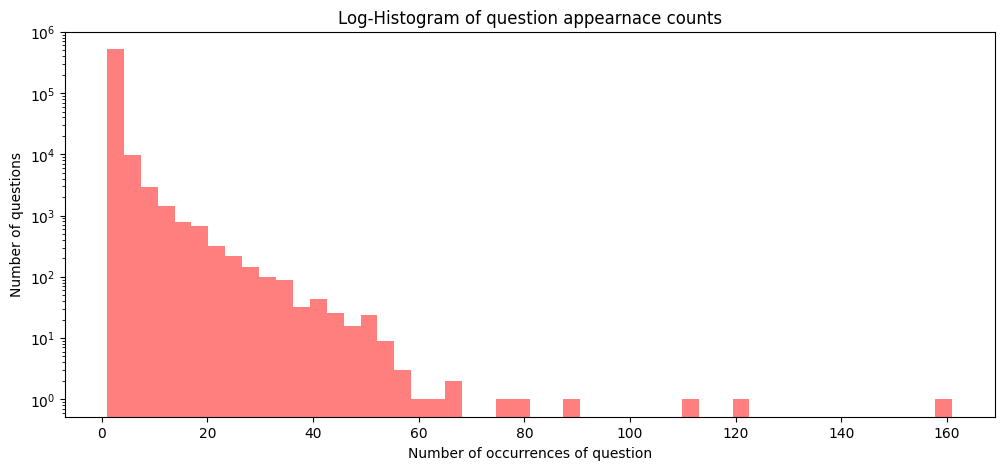

In [37]:
plt.figure(figsize=(12, 5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='r', label='word')
plt.yscale('log')
plt.title('Log-Histogram of question appearnace counts')
plt.xlabel('Number of occurrences of question')
plt.ylabel('Number of questions')
plt.show()

In [38]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
print('제1사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제3사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50
중복 표준편차: 1.91
중복 중간길이: 1.0
제1사분위 중복: 1.0
제3사분위 중복: 1.0


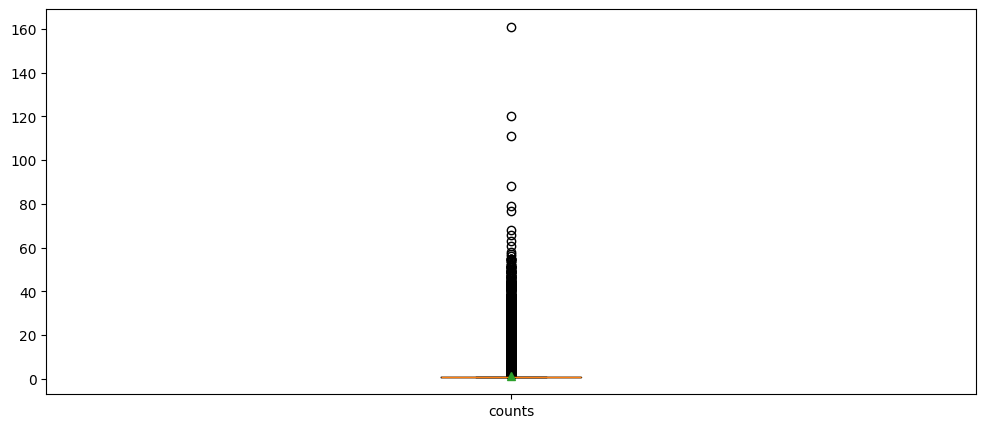

In [39]:
plt.figure(figsize=(12,5))
plt.boxplot([train_set.value_counts()], tick_labels=['counts'], showmeans=True)
plt.show()

In [40]:
from wordcloud import WordCloud

In [41]:
cloud = WordCloud(width=300, height=150).generate(" ".join(train_set.astype(str)))

(-0.5, 299.5, 149.5, -0.5)

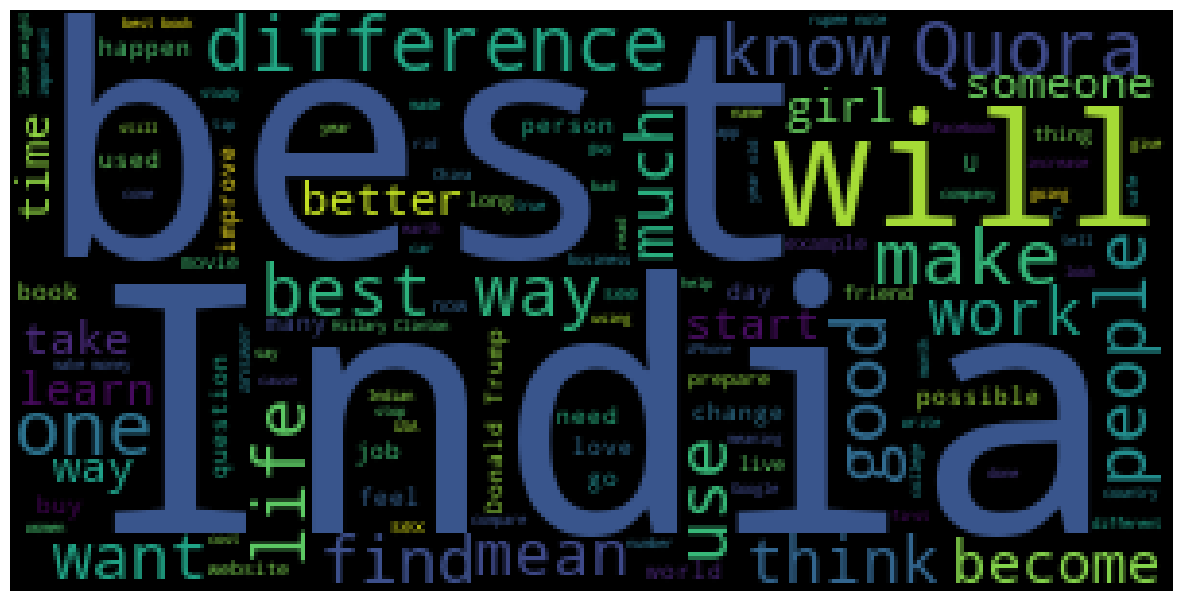

In [42]:
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

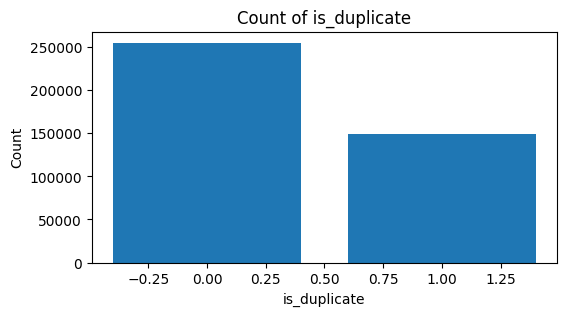

In [43]:
fig, ax = plt.subplots(ncols=1)
fig.set_size_inches(6,3)

duplicate_counts = train_data['is_duplicate'].value_counts()

ax.bar(duplicate_counts.index, duplicate_counts.values)

ax.set_xlabel('is_duplicate')
ax.set_ylabel('Count')
ax.set_title('Count of is_duplicate')
plt.show()

In [44]:
train_length = train_set.apply(len)

In [45]:
train_length

0          66
1          51
2          73
3          50
4          76
         ... 
808575     79
808576     42
808577     17
808578    127
808579     45
Length: 808580, dtype: int64

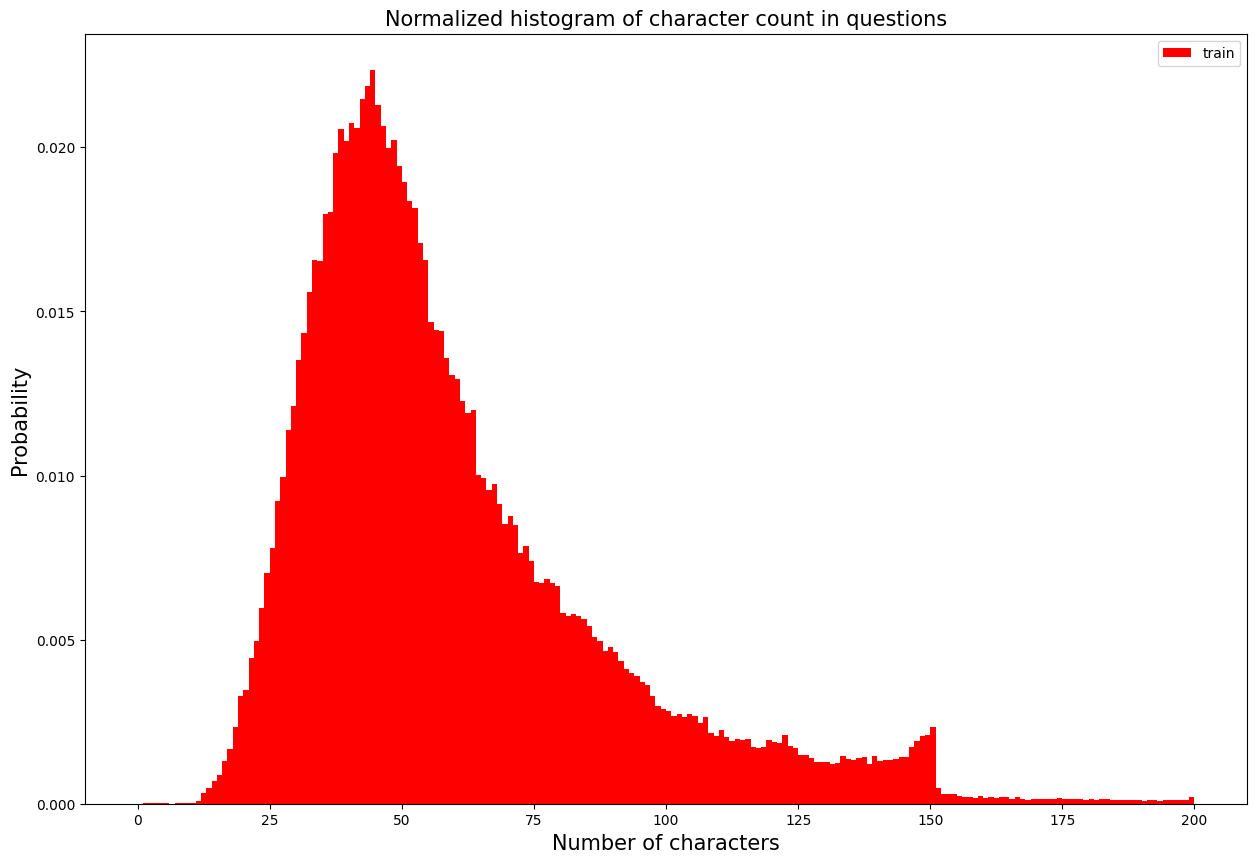

In [46]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0, 200], facecolor='r', density=True, label='train')
plt.title('Normalized histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()

In [47]:
print('질문 길이 최댓값: {}'.format(np.max(train_length)))
print('질문 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간값: {}'.format(np.median(train_length)))
print('질문 길이 제3사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

질문 길이 최댓값: 1169
질문 길이 평균값: 59.82
질문 길이 표준편차: 31.96
질문 길이 중간값: 51.0
질문 길이 제3사분위: 39.0
질문 길이 제3사분위: 72.0


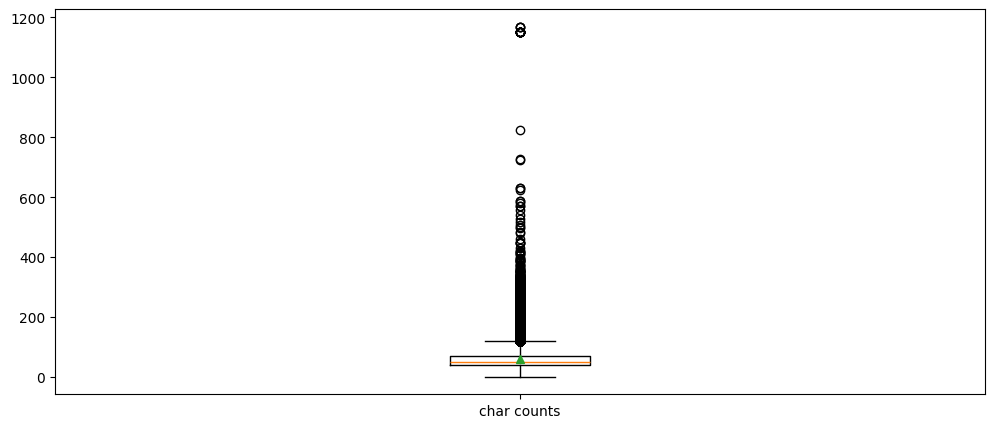

In [48]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_length, tick_labels=['char counts'], showmeans=True)
plt.show()

In [49]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

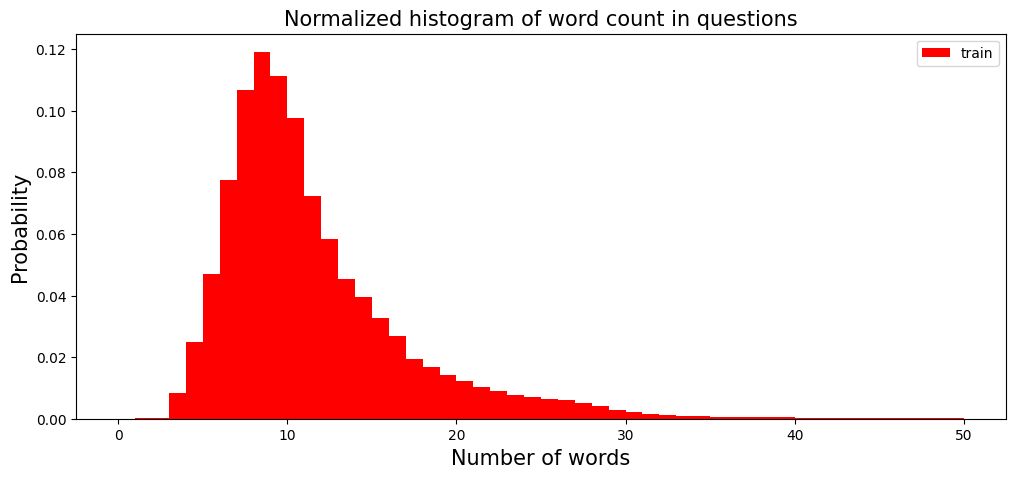

In [50]:
plt.figure(figsize=(12, 5))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Normalized histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()

In [51]:
print('질문 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('질문 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('질문 단어 개수 99퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

질문 단어 개수 최댓값: 237
질문 단어 개수 평균값: 11.06
질문 단어 개수 표준편차: 5.89
질문 단어 개수 중간값: 10.0
질문 단어 개수 제3사분위: 7.0
질문 단어 개수 제3사분위: 13.0
질문 단어 개수 99퍼센트: 31.0


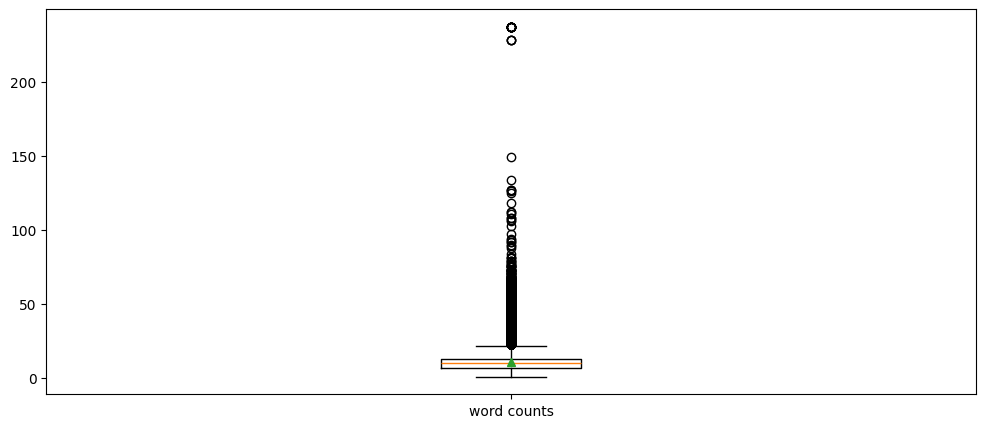

In [52]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_word_counts, tick_labels=['word counts'], showmeans=True)
plt.show()

In [53]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x))
math = np.mean(train_set.apply(lambda  x: '[math]' in x))
fullstop = np.mean(train_set.apply(lambda x: '.' in x))
capital_first =np.mean(train_set.apply(lambda x:x[0].isupper()))
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x])))

In [54]:
print('물음표가 있는 질문: {:.2f}%'.format(qmarks * 100))
print('수학 태그가 있는 질문: {:.2f}%'.format(math * 100))
print('질문이 가득 찼을 때: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가 있는 질문: {:.2f}%'.format(numbers * 100))

물음표가 있는 질문: 99.87%
수학 태그가 있는 질문: 0.12%
질문이 가득 찼을 때: 6.31%
첫 글자가 대문자인 질문: 99.81%
대문자가 있는 질문: 99.95%
숫자가 있는 질문: 11.83%


# Data Preprocessing

In [55]:
import pandas as pd
import numpy as np
import re
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [56]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [66]:
train_pos_data = train_data.loc[train_data['is_duplicate'] == 1]
train_neg_data = train_data.loc[train_data['is_duplicate'] == 0]

In [67]:
len(train_pos_data)

149263

In [68]:
len(train_neg_data)

255027

In [69]:
class_difference = len(train_neg_data) - len(train_pos_data)

In [70]:
sample_frac = 1 - (class_difference / len(train_neg_data))

In [71]:
sample_frac

0.5852831268846044

In [72]:
train_neg_data = train_neg_data.sample(frac = sample_frac)

In [73]:
len(train_neg_data)

149263

In [74]:
train_data = pd.concat([train_neg_data, train_pos_data])

In [75]:
FILTERS = "([~.,!?\"':;)(])"
MAX_SEQUENCE_LENGTH = 31

In [76]:
change_filter = re.compile(FILTERS)

In [77]:
question1 = [str(s) for s in train_data['question1']]
question2 = [str(s) for s in train_data['question2']]

In [78]:
filtered_question1 = list()
filtered_question2 = list()

for q in question1:
    filtered_question1.append(re.sub(change_filter, "", q).lower())

for q in question2:
    filtered_question2.append(re.sub(change_filter, "", q).lower())

In [79]:
filtered_question1

['which are the best universities in germany for a masters in finance',
 'what is the specific mechanism for farbys disease',
 'is it too late to change a high school elective',
 'what is time-multiplier setting of a protective relay',
 'is time intrinsically linked to space or can it exist on its own also is time more fundamental than space',
 'is it true that for pursuing any post graduation abroad one needs to have work experience',
 'how can you delete a question that you asked on quora',
 'how do i convince my friends to go on a trip',
 'what are the newest or best gadgets tools techniques that help one learn quicker memorize tons of complex books sleep less or be more alert',
 'how much a divorce lawyer consultation can cost in mumbai i was asked 35 k should it be real',
 'what is a plane wavefront a spherical wavefront and a cylindrical wavefront',
 'will the iphone 8 have a usb type c port',
 'can a person become omniscient',
 'what is the worst thing you ever smelled',
 'why d

In [80]:
filtered_question2

['which are the best universities in germany for getting a degree in mechanical engineering',
 'i would be giving my ca ipcc exam in nov16 is it advisable to register for cs executive exam in june17',
 'is 20 years old too late to change your life completely to a highly successful life',
 'what is set up and hold time in flip flops',
 'why is there no right way to meditate',
 'public administrator social challenges',
 'how do i delete an answer for a question that i asked on quora',
 'how can you convince your parents to let you go on a trip',
 'what does non-cooperative game means',
 'i have just finished my bds and want to open a dental clinic in mumbai please give me some idea in which locality i should open and how much it will cost me',
 'why do extraterrestrial bodies always appear as a spherical shape why not square or cylindrical',
 'will the iphone 7 have a usb type c port',
 'when ubisoft internship actually starts',
 'whats the worst tasting thing you have ever actually eate

In [81]:
tokenizer = Tokenizer()

In [83]:
tokenizer.fit_on_texts(filtered_question1 + filtered_question2)

In [85]:
question1_sequence = tokenizer.texts_to_sequences(filtered_question1)
question2_sequence = tokenizer.texts_to_sequences(filtered_question2)

In [86]:
question1_sequence

[[22, 11, 1, 17, 466, 8, 668, 14, 7, 848, 8, 1331],
 [2, 3, 1, 1348, 4498, 14, 45148, 2117],
 [3, 19, 356, 749, 6, 188, 7, 238, 220, 10278],
 [2, 3, 63, 21103, 3329, 10, 7, 11580, 9065],
 [3,
  63,
  21104,
  4352,
  6,
  453,
  26,
  13,
  19,
  293,
  20,
  133,
  269,
  578,
  3,
  63,
  87,
  3758,
  93,
  453],
 [3, 19, 245, 28, 14, 2108, 61, 450, 1336, 1196, 49, 1235, 6, 29, 84, 306],
 [4, 13, 15, 404, 7, 147, 28, 15, 455, 20, 46],
 [4, 9, 5, 1370, 18, 268, 6, 128, 20, 7, 1232],
 [2,
  11,
  1,
  10514,
  26,
  17,
  1080,
  909,
  2339,
  28,
  176,
  49,
  66,
  10017,
  3759,
  9795,
  10,
  2519,
  140,
  494,
  537,
  26,
  23,
  87,
  9397],
 [4,
  78,
  7,
  2754,
  2646,
  19678,
  13,
  325,
  8,
  699,
  5,
  60,
  455,
  2554,
  2068,
  30,
  19,
  23,
  190],
 [2, 3, 7, 1741, 28897, 7, 5857, 28897, 12, 7, 12653, 28897],
 [36, 1, 199, 625, 29, 7, 1946, 486, 221, 2429],
 [13, 7, 136, 86, 16562],
 [2, 3, 1, 426, 153, 15, 76, 45149],
 [16,
  9,
  270,
  6377,
  8579,
  14

In [87]:
q1_data = pad_sequences(question1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
q2_data = pad_sequences(question2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [88]:
q1_data

array([[  22,   11,    1, ...,    0,    0,    0],
       [   2,    3,    1, ...,    0,    0,    0],
       [   3,   19,  356, ...,    0,    0,    0],
       ...,
       [   4,   21,    7, ...,    0,    0,    0],
       [   2,   21, 8193, ...,    0,    0,    0],
       [   9,   15,  304, ...,    0,    0,    0]])

In [89]:
word_vocab = {}
word_vocab = tokenizer.word_index
word_vocab['<PAD>'] = 0

In [90]:
word_vocab

{'the': 1,
 'what': 2,
 'is': 3,
 'how': 4,
 'i': 5,
 'to': 6,
 'a': 7,
 'in': 8,
 'do': 9,
 'of': 10,
 'are': 11,
 'and': 12,
 'can': 13,
 'for': 14,
 'you': 15,
 'why': 16,
 'best': 17,
 'my': 18,
 'it': 19,
 'on': 20,
 'does': 21,
 'which': 22,
 'be': 23,
 'if': 24,
 'some': 25,
 'or': 26,
 'get': 27,
 'that': 28,
 'have': 29,
 'should': 30,
 'with': 31,
 'your': 32,
 'an': 33,
 'from': 34,
 'india': 35,
 'will': 36,
 'people': 37,
 'who': 38,
 'when': 39,
 'like': 40,
 'good': 41,
 'would': 42,
 'at': 43,
 'there': 44,
 'as': 45,
 'quora': 46,
 'about': 47,
 'between': 48,
 'one': 49,
 'most': 50,
 'not': 51,
 'way': 52,
 'make': 53,
 'we': 54,
 'did': 55,
 'life': 56,
 'by': 57,
 'where': 58,
 'money': 59,
 'was': 60,
 'any': 61,
 'so': 62,
 'time': 63,
 'me': 64,
 'after': 65,
 'learn': 66,
 'know': 67,
 'this': 68,
 'they': 69,
 'difference': 70,
 'has': 71,
 'whats': 72,
 'new': 73,
 'think': 74,
 'trump': 75,
 'ever': 76,
 'am': 77,
 'much': 78,
 'use': 79,
 'indian': 80,
 'al

In [91]:
labels = np.array(train_data['is_duplicate'], dtype=int)

In [92]:
print('Shape of question1 data: {}'.format(q1_data.shape))
print('Shape of question2 data: {}'.format(q2_data.shape))
print('Shape of label: {}'.format(labels.shape))
print('Words in index: {}'.format(len(word_vocab)))

Shape of question1 data: (298526, 31)
Shape of question2 data: (298526, 31)
Shape of label: (298526,)
Words in index: 76511


In [93]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [94]:
data_configs

{'vocab': {'the': 1,
  'what': 2,
  'is': 3,
  'how': 4,
  'i': 5,
  'to': 6,
  'a': 7,
  'in': 8,
  'do': 9,
  'of': 10,
  'are': 11,
  'and': 12,
  'can': 13,
  'for': 14,
  'you': 15,
  'why': 16,
  'best': 17,
  'my': 18,
  'it': 19,
  'on': 20,
  'does': 21,
  'which': 22,
  'be': 23,
  'if': 24,
  'some': 25,
  'or': 26,
  'get': 27,
  'that': 28,
  'have': 29,
  'should': 30,
  'with': 31,
  'your': 32,
  'an': 33,
  'from': 34,
  'india': 35,
  'will': 36,
  'people': 37,
  'who': 38,
  'when': 39,
  'like': 40,
  'good': 41,
  'would': 42,
  'at': 43,
  'there': 44,
  'as': 45,
  'quora': 46,
  'about': 47,
  'between': 48,
  'one': 49,
  'most': 50,
  'not': 51,
  'way': 52,
  'make': 53,
  'we': 54,
  'did': 55,
  'life': 56,
  'by': 57,
  'where': 58,
  'money': 59,
  'was': 60,
  'any': 61,
  'so': 62,
  'time': 63,
  'me': 64,
  'after': 65,
  'learn': 66,
  'know': 67,
  'this': 68,
  'they': 69,
  'difference': 70,
  'has': 71,
  'whats': 72,
  'new': 73,
  'think': 74,

# Save Train data set

In [95]:
TRAIN_Q1_DATA = 'q1_train.npy'
TRAIN_Q2_DATA = 'q2_train.npy'
TRAIN_LABEL_DATA = 'label_train.npy'
DATA_CONFIGS = 'data_configs.npy'

In [96]:
PREPRO_DATA_PATH = './preprocessed_data/'

In [97]:
np.save(open(PREPRO_DATA_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(PREPRO_DATA_PATH + TRAIN_Q2_DATA, 'wb'), q2_data)
np.save(open(PREPRO_DATA_PATH + TRAIN_LABEL_DATA, 'wb'), labels)

In [98]:
json.dump(data_configs, open(PREPRO_DATA_PATH + DATA_CONFIGS, 'w'))

# Load Test data set

In [103]:
test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')

C:\Users\User\AppData\Local\Temp\ipykernel_39752\862812218.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')


In [104]:
test_data.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [105]:
len(test_data)

3563475

In [106]:
valid_ids = [type(x) == int for x in test_data.test_id]

In [107]:
test_data = test_data[valid_ids].drop_duplicates()

In [108]:
len(test_data)

2345796

In [109]:
test_question1 = [str(s) for s in test_data['question1']]
test_question2 = [str(s) for s in test_data['question2']]

In [110]:
filtered_test_question1 = list()
filtered_test_question2 = list()

In [111]:
for q in test_question1:
    filtered_test_question1.append(re.sub(change_filter, "", q).lower())

for q in test_question2:
    filtered_test_question2.append(re.sub(change_filter, "", q).lower())

In [112]:
test_question1_sequence = tokenizer.texts_to_sequences(filtered_test_question1)
test_question2_sequence = tokenizer.texts_to_sequences(filtered_test_question2)

In [113]:
test_q1_data = pad_sequences(test_question1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_question2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [114]:
test_id = np.array(test_data['test_id'])

In [115]:
print('Shape of question1 data: {}'.format(test_q1_data.shape))
print('Shape of question2 data: {}'.format(test_q2_data.shape))
print('Shape of ids: {}'.format(test_id.shape))

Shape of question1 data: (2345796, 31)
Shape of question2 data: (2345796, 31)
Shape of ids: (2345796,)


# Save Test data set

In [116]:
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

In [117]:
np.save(open(PREPRO_DATA_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(PREPRO_DATA_PATH + TEST_Q2_DATA, 'wb'), test_q2_data)
np.save(open(PREPRO_DATA_PATH + TEST_ID_DATA, 'wb'), test_id)